<a href="https://colab.research.google.com/github/AngelDavidRuizB/Trabajos-IA-y-mini-Robots-Angel-David-Ruiz-Barbosa/blob/main/Ejercicios_semana_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solución ejercicios semana 2

## Ejercicio 2.1


Definimos los escenarios del automata celular:

*   **Retículo (L):** El espacio donde ocurre la interacción (la casa, el salón de clase, el bus/metro).
*   **Células:** Las personas (usted y quienes le rodean).


*  **Estados (w):** Los posibles comportamientos o situaciones (sentado, de   pie, hablando, en silencio, caminando, etc.).
*   **Vecindad (U):** Las personas con las que interactúa directamente (familia, compañeros de clase, pasajeros cercanos).







Definimos las reglas para cada uno de los entornos:


1.   Casa:


      *   **Regla 1:** Si alguien de la familia se sienta a comer → los demás miembros se acercan a la mesa en los siguientes minutos.
      *   **Regla 2:** Si alguien enciende la televisión en la sala → los vecinos (familiares cercanos) tienden a reunirse alrededor.
      *   **Regla 3:** Si una persona se va a dormir y apaga la luz → las personas en habitaciones contiguas reducen el volumen de ruido.
      *   **Regla 4:** Si alguien saluda al llegar → las demás personas responden el saludo.




2.   Universidad:
    
      *   **Regla 1:** Si el profesor entra al aula → los estudiantes se sientan y guardan silencio.
      *   **Regla 2:** Si un compañero vecino saca el cuaderno → usted también saca sus materiales.
      *   **Regla 3:** Si suena el timbre de fin de clase → todos los estudiantes se levantan y guardan sus cosas.
      *   **Regla 4:** Si la mayoría de compañeros cercanos están usando el celular → aumenta la probabilidad de que usted también lo use


3. Transporte:


      *   **Regla 1:** Si el bus llega y la puerta se abre → las personas en la parada forman fila y suben.
      *   **Regla 2:** Si una persona se levanta de su asiento al acercarse a una parada → las personas de pie cercanas se preparan para sentarse.


      *   **Regla 3:** Si el vagón/bus está lleno y alguien empuja → los vecinos inmediatos se desplazan en la misma dirección
      *   **Regla 4:** Si una persona mayor o embarazada sube → la persona sentada más cercana le cede el puesto.






## Ejercico 2.2

Modelo de difusión de una moda

**Estados (w):**

*   N = No adoptante (no sigue la moda)
*   C = Curioso (ha oído de la moda)



*   A = Adoptante (sigue la moda)
*   D = Desencantado (dejó la moda)

**Reglas:**

Si celda = N y tiene n vecinos A entonces pasa a C con probabilidad n * 0.15.

Si celda = C entonces después de 3 ciclos pasa a A con probabilidad 0.7, o vuelve a N con probabilidad 0.3.

Si celda = A entonces después de 20 ciclos pasa a D con probabilidad 0.1 por ciclo.

Si celda = D entonces permanece en D (o vuelve a N después de 10 ciclos).



## Ejercicio 2.3

Definimos el entorno en el cuál va a estar el robot:


*   **Espacio:** Cuadrícula 2D
*   **Objetos:** Habran 4 obstaculos colocados de manera aleatoria en la cuadrícula los cuales van a ocupar celdas en la misma


*   **Robot:** Ocupa una celda y se puede mover en las 4 direcciones: norte, sur, este y oeste


Definimos los tres sensores que tendrá el robot


*   **Sensor central (C):** Mide distancia al obstáculo más cercano en la dirección frontal

*   **Sensor Izquierdo (I):** Mide distancia al obstáculo más cercano a 45° a la izquierda
*   **Sensor Derecho (D):** Mide distancia al obstáculo más cercano a 45° a la derecha

Los tres estados en los que puede estar cada sensor serán:


*   **0:** obstáculo muy cerca

*   **1:** obstáculo a distancia media
*   **2:** camino libre o el obstaculo esta lejos

Configuramos los motores del robot para definir su movimiento



*   **Estado 0:** Motor apagado

*   **Estado 1:** Motor encendido girando hacia adelante
*  **Estado 2:** Motor encendido girando hacia atrás

Dado que hay tres sesores con tres estados posibles para cada uno, hay un total del 27 combinaciones posibles de entradas para el robot




















In [ ]:
# Pseudocódigo
import random

# Inicializar
grid = crear_grid(50, 50)
objetos = colocar_4_objetos_aleatorios(grid)
robot = colocar_robot(grid, posicion_aleatoria, orientacion='N')

for t in range(1000):  # 1000 pasos de tiempo
    # 1. Leer sensores
    C = medir_distancia(robot, 'centro', grid)
    D = medir_distancia(robot, 'derecha', grid)
    I = medir_distancia(robot, 'izquierda', grid)

    # 2. Discretizar lecturas a estados {0, 1, 2}
    sC = discretizar(C)
    sD = discretizar(D)
    sI = discretizar(I)

    # 3. Consultar tabla de reglas
    sMi = tabla_reglas_Mi(sC, sD, sI)
    sMd = tabla_reglas_Md(sC, sD, sI)

    # 4. Ejecutar motores
    mover_robot(robot, sMi, sMd)

    # 5. Verificar no colisión
    if robot.posicion in objetos:
        print("¡COLISIÓN! Revisar reglas")

    # 6. Visualizar
    dibujar(grid, robot, objetos)

## Ejercicio 2.4

En la siguiente imagen se detalla los diferentes servicios y edificios existentes en la zona sur de la ciudad de Bogotá DC, entre estos se encuentran Hospitales, Escuelas y Prisiones

### Hospitales

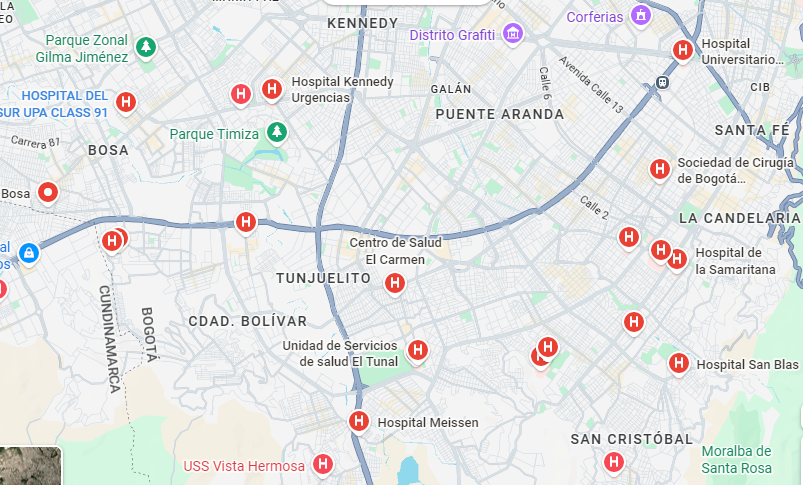

### Escuelas

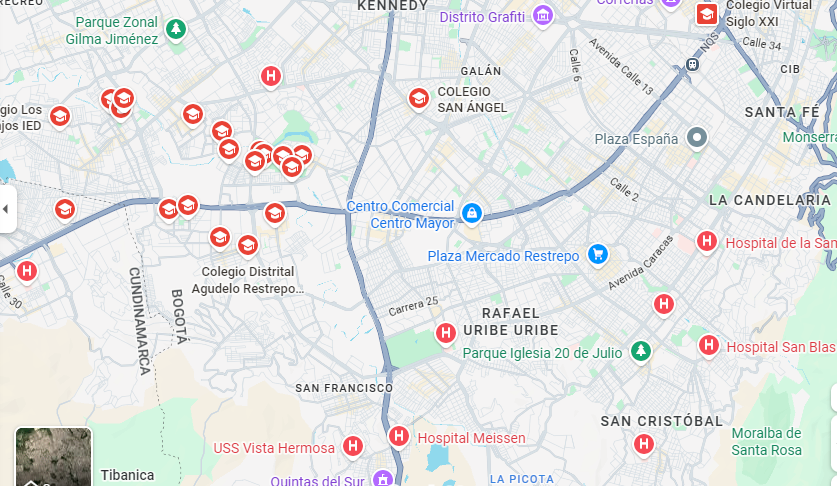

### Prisiones:

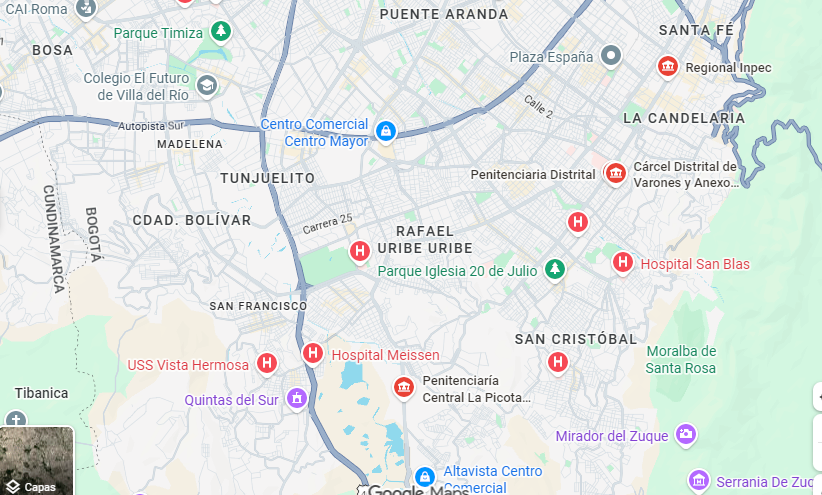

Utilizando la herramienta de Geogebra se genera el gráfico del diagrama de Voronoi en seleccinando cada edificio como un punto en el plano, dado que las prisiones son el edificio con menor cantidad en el sur de la ciudad, este sera el diagrama mas simple y cuyas zonas se pueden diferenciar de manera más facil

En este podemos ver como en las localidades de Ciudad Bolivar, Tunjuelito y Bosa, hay un menor número de prisiones y una mayor distancia hacia las mismas, a diferencia de localidades como Santa Fe, cuyas prisiones se encuentran a una menor distancia, lo cuál permite un tiempo de reacción menor ante un crimen.

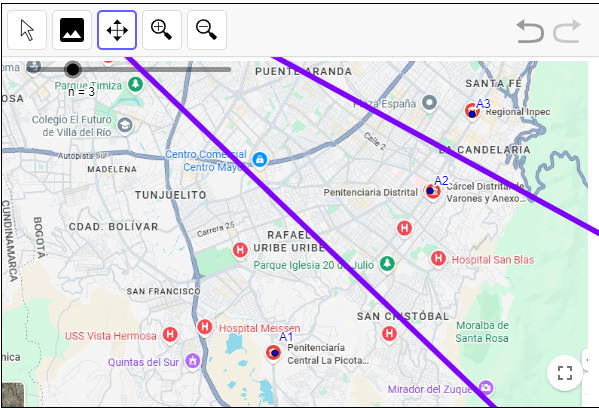

Ahora con la misma herramienta, se generaran los diagramas de Voronoi para las escuelas que se encuentran en dicha área:

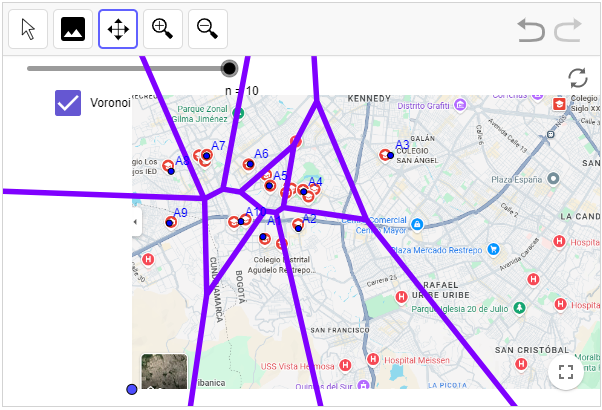

Finalmente utilizando dicha herramienta se generara el diagrama de Voronoi par los hospitales, dado que esta solo permite un máximo de 10 nodos, estos se colorcaran por las agrupaciones que existan de hospitales en la ciudad.

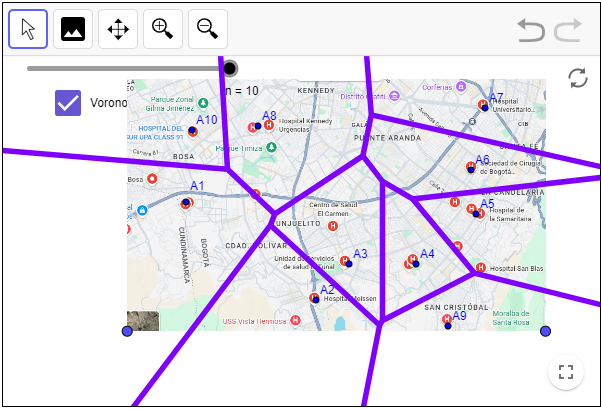

Como podemos ver, en las zona ubicadas más al sur hay una mayor ausencia al acceso a hospitales, generando así una mayor demanada de estos para los habitantes de dicha zona

En conclusión, podemos evidenciar como en la zonas del sur de la ciudad, hay una mayor ausencia de edificios como hospitaes, escuelas y prisiones, por lo cuál es necesaria una mayor inversión en infraestrucutra en estas zonas con el objetivo de mejorar la vida de los habitantes.